In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zhaoyingzhu/heartcsv")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 4.55k/4.55k [00:00<00:00, 1.33MB/s]

Extracting files...
Path to dataset files: C:\Users\chatl\.cache\kagglehub\datasets\zhaoyingzhu\heartcsv\versions\1


In [2]:
import numpy as nm 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("./1/Heart.csv") 

In [4]:
df.head(8)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No


In [5]:
df.shape 

(303, 15)

In [6]:
print("Total missing values: ", df.isnull().sum().sum())

Total missing values:  6


In [7]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [8]:
(df == 0).sum(axis=0)

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64

In [9]:
mean_age =df['Age'].mean() 
mean_age 

np.float64(54.43894389438944)

In [10]:
df.columns 

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [11]:
df2 = df.filter(['Age','Sex','ChestPain','RestBP','Chol']) 

In [12]:
df2

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [13]:
mean = df['Ca'].mean()
df['Ca'] = df['Ca'].fillna(value=mean)

In [14]:
mode = df['Thal'].mode().iloc[0]
df['Thal'] = df['Thal'].fillna(value=mode)

In [15]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

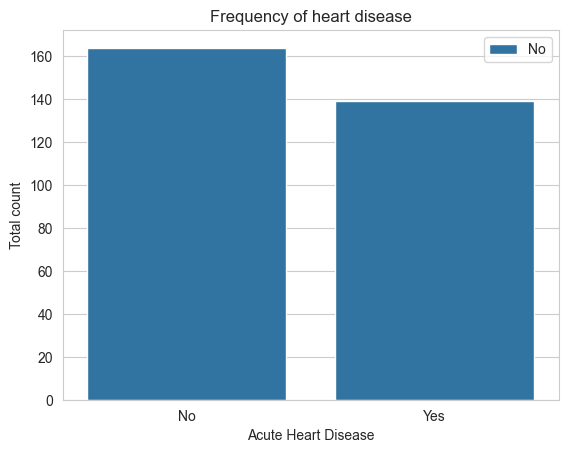

In [19]:
sns.set_style("whitegrid") 
sns.countplot(x='AHD',data=df)
plt.xlabel("Acute Heart Disease") 
plt.ylabel("Total count") 
plt.title("Frequency of heart disease") 
plt.legend(['No','Yes'],loc='upper right')

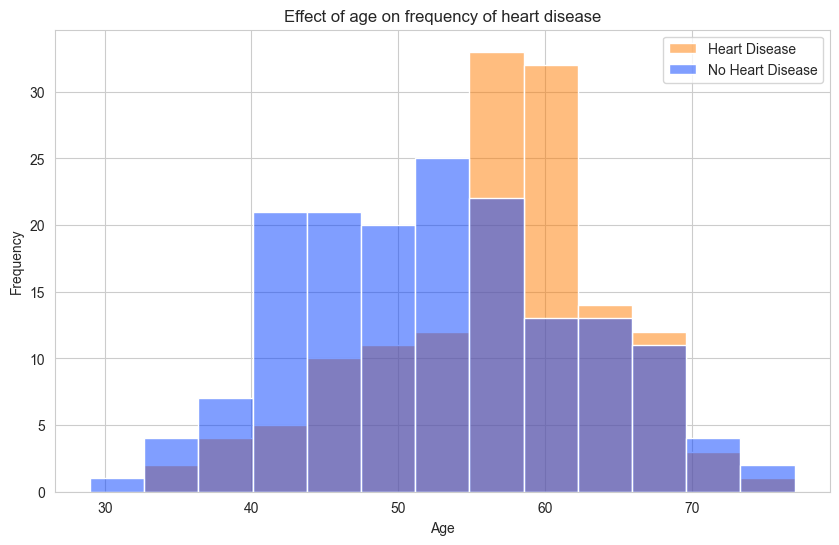

In [21]:
fig, ax = plt.subplots() 
fig.set_size_inches(10, 6) 
sns.histplot(x="Age", data=df, hue="AHD", palette="bright") 
sns.set_style("whitegrid") 
plt.title("Effect of age on frequency of heart disease") 
plt.xlabel("Age") 
plt.ylabel("Frequency") 
plt.legend(["Heart Disease","No Heart Disease"]) 
plt.show() 

In [22]:
df['ChestPain'].unique() 

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

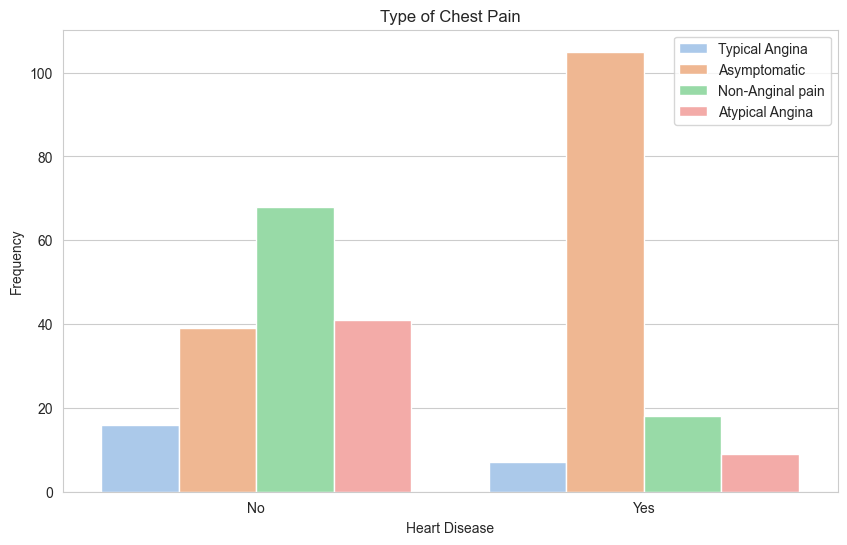

In [23]:
fig, ax = plt.subplots() 
fig.set_size_inches(10, 6) 
sns.countplot(x="AHD", hue="ChestPain", data=df, palette="pastel") 
plt.title("Type of Chest Pain") 
plt.xlabel("Heart Disease") 
plt.ylabel("Frequency") 
plt.legend(["Typical Angina","Asymptomatic", "Non-Anginal pain", 
"Atypical Angina"]) 
plt.show() 

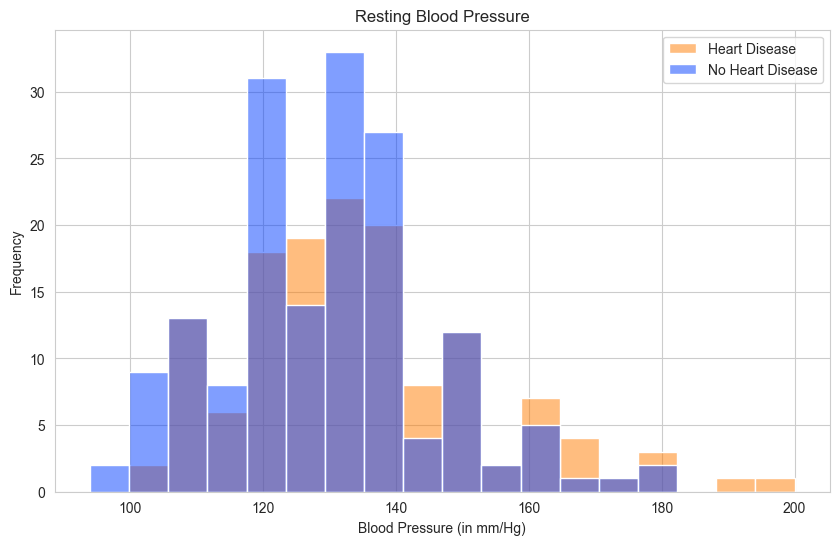

In [24]:
fig, ax = plt.subplots() 
fig.set_size_inches(10, 6) 
sns.histplot(x="RestBP" , data=df, hue="AHD", palette="bright") 
sns.set_style("whitegrid") 
plt.title("Resting Blood Pressure") 
plt.xlabel("Blood Pressure (in mm/Hg)") 
plt.ylabel("Frequency") 
plt.legend(["Heart Disease","No Heart Disease"]) 
plt.show() 

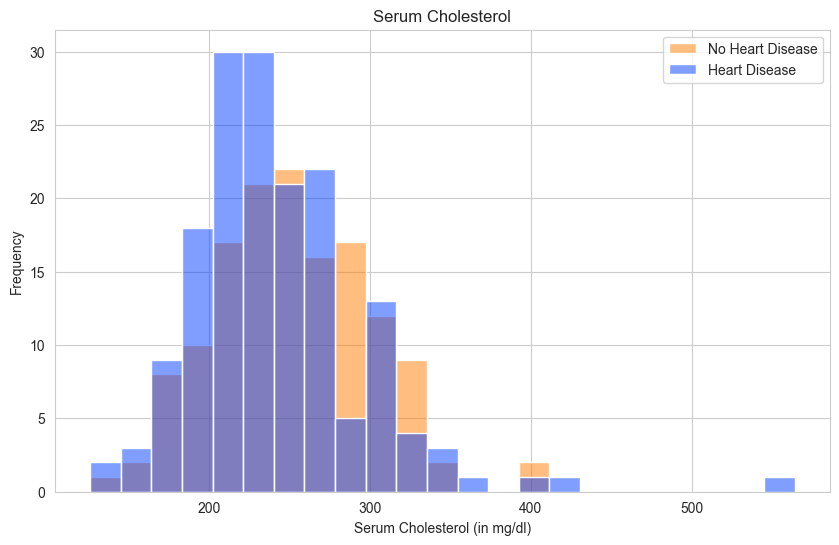

In [25]:
fig, ax = plt.subplots() 
fig.set_size_inches(10, 6) 
sns.histplot(x="Chol" , data=df, hue="AHD", palette="bright") 
sns.set_style("whitegrid") 
plt.title("Serum Cholesterol") 
plt.xlabel("Serum Cholesterol (in mg/dl)") 
plt.ylabel("Frequency") 
plt.legend(["No Heart Disease","Heart Disease"]) 
plt.show()

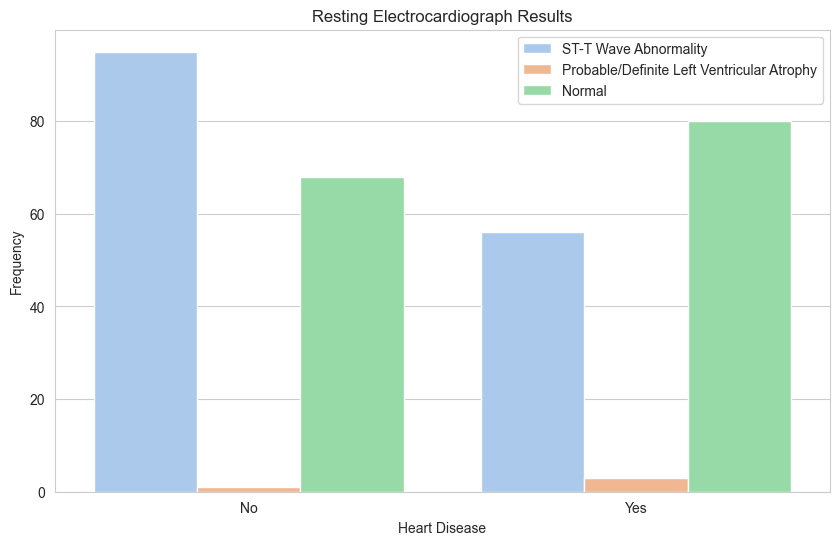

In [27]:
fig, ax = plt.subplots() 
fig.set_size_inches(10, 6) 
sns.countplot(x="AHD", hue="RestECG", data=df, palette="pastel") 
plt.title("Resting Electrocardiograph Results") 
plt.xlabel("Heart Disease") 
plt.ylabel("Frequency") 
plt.legend(["ST-T Wave Abnormality", "Probable/Definite Left Ventricular Atrophy", "Normal"])
plt.show()

In [28]:
X = df[['Age','Sex','ChestPain','RestBP','Chol','RestECG','MaxHR']] 
Y= df['AHD'] 

In [30]:
from sklearn.model_selection import train_test_split 
X_train, Y_train, X_test, Y_test = train_test_split(X,Y,test_size=0.25) 

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 299 to 37
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        227 non-null    int64 
 1   Sex        227 non-null    int64 
 2   ChestPain  227 non-null    object
 3   RestBP     227 non-null    int64 
 4   Chol       227 non-null    int64 
 5   RestECG    227 non-null    int64 
 6   MaxHR      227 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 14.2+ KB


In [32]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 222 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        76 non-null     int64 
 1   Sex        76 non-null     int64 
 2   ChestPain  76 non-null     object
 3   RestBP     76 non-null     int64 
 4   Chol       76 non-null     int64 
 5   RestECG    76 non-null     int64 
 6   MaxHR      76 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.8+ KB
